In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [4]:
frame_count = 300

def read_hbonds(exp_id, frame_count):
    hbonds = [np.loadtxt(exp_id+'/'+exp_id+"_frame"+str(frame)+"_hbonds.dat")[:,1] for frame in range(frame_count)]
    return np.vstack(hbonds).T

In [5]:
for exp_count in range(1,46):
    if exp_count == 1:
        hbonds = read_hbonds(f'd371g{exp_count}',frame_count)
    else:
        hbonds += read_hbonds(f'd371g{exp_count}',frame_count)
hbonds
#np.savetxt("hbonds.dat",hbonds)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
np.argmax(hbonds.flatten())/300

367.1218637992832

In [7]:
hbonds.shape

(428, 279)

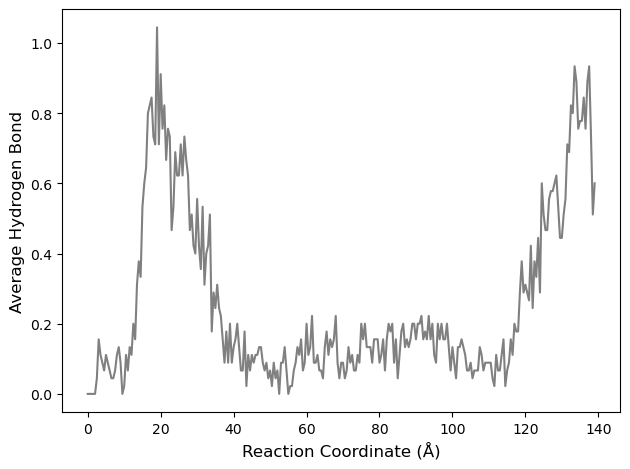

In [8]:
avg_hbonds = hbonds.sum(axis=0)/45
plt.plot(np.arange(0,139.5,0.5), hbonds.sum(axis=0)/45,color='gray')
plt.ylabel('Average Hydrogen Bond',fontsize=12)
plt.xlabel('Reaction Coordinate (\u212B)',fontsize=12)
plt.tight_layout()

np.savetxt("d371g_avg_coord_hbonds.dat",avg_hbonds)

In [9]:
residual_sums = hbonds.sum(axis=1)
nonzero_residues = np.where(residual_sums>0)[0]
nonzero_residues
np.savetxt("residsum_coord.dat",residual_sums)

In [10]:
x = np.arange(0,290)*0.5
x

len(x)
len(hbonds)

428

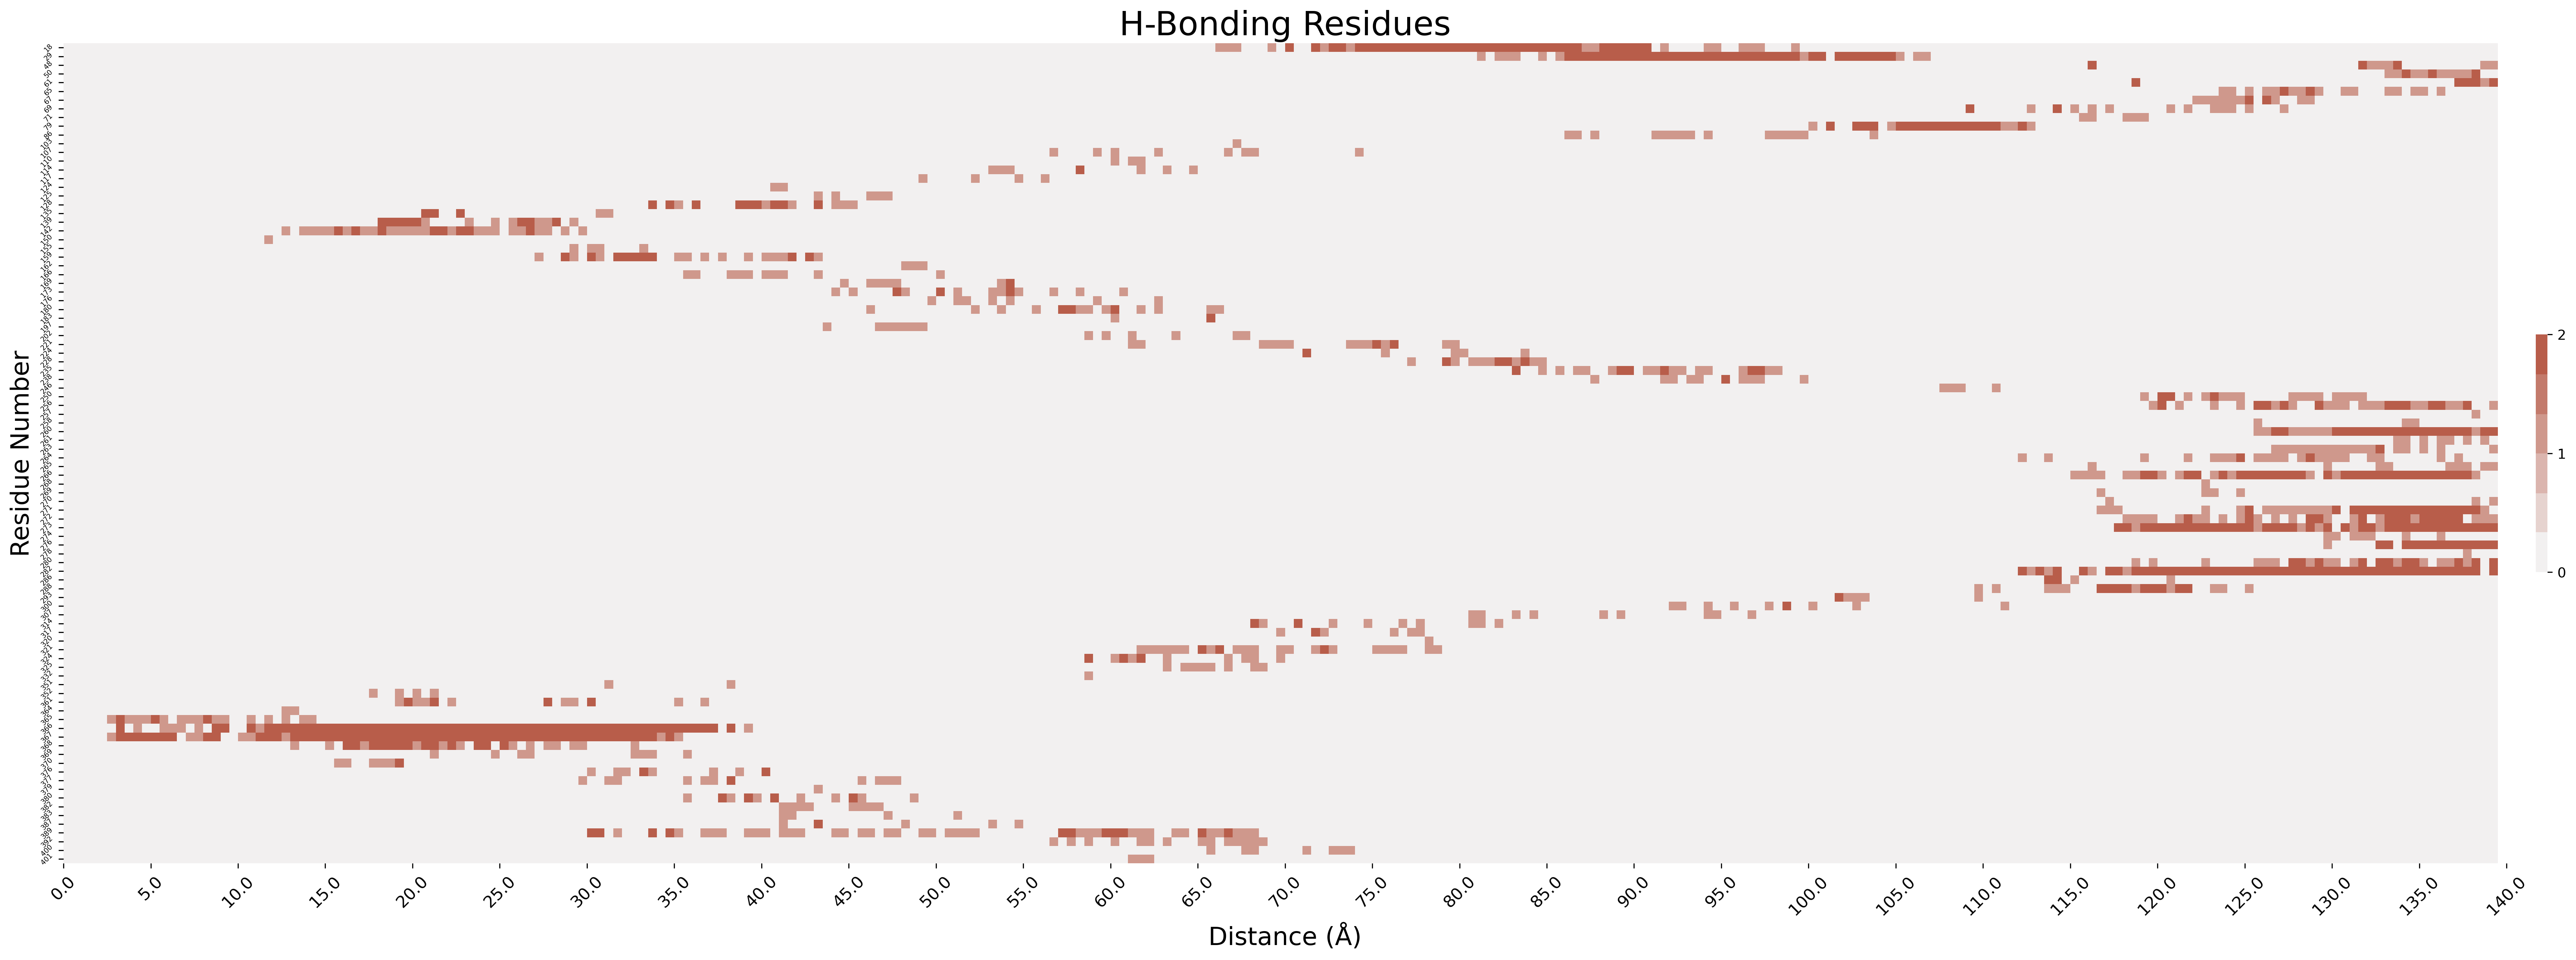

In [11]:
fig, ax = plt.subplots(1,1,figsize=(30,48), dpi=300)

#cmap = sns.light_palette((20, 60, 50), input="husl")
#sns.heatmap(hbonds[nonzero_residues,:], cmap=sns.color_palette("rocket_r", as_cmap=True), ax=ax, vmin=0,vmax=2.5, center=1.25, cbar_kws={'shrink': 0.2})
colormap = sns.light_palette((20, 60, 50), input="husl")

sns.heatmap(hbonds[nonzero_residues,:], cmap=colormap, ax=ax, vmin=0,vmax=2, center=1, cbar_kws={'shrink': 0.05, 'ticks':[0.0, 1.0, 2.0], 'pad':0.01})
ax.set_yticklabels(nonzero_residues,rotation=45,fontsize=5);
xticks = np.arange(0,x.shape[0],10)
ax.set_xticks(xticks);
ax.set_xticklabels(x[xticks],rotation=45,fontsize=12);
ax.set_aspect('equal')
plt.title('H-Bonding Residues', fontsize = 24)
plt.ylabel('Residue Number',fontsize=18)
plt.xlabel('Distance (\u212B)',fontsize=18)


plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.28)